In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [9]:

sales_monthly = pd.read_csv('Super_Store_data.csv', encoding='ISO-8859-1',parse_dates=['Order Date'], index_col='Order Date')['Sales'].resample('M').sum()
stl = STL(sales_monthly, seasonal=13) 
result = stl.fit()

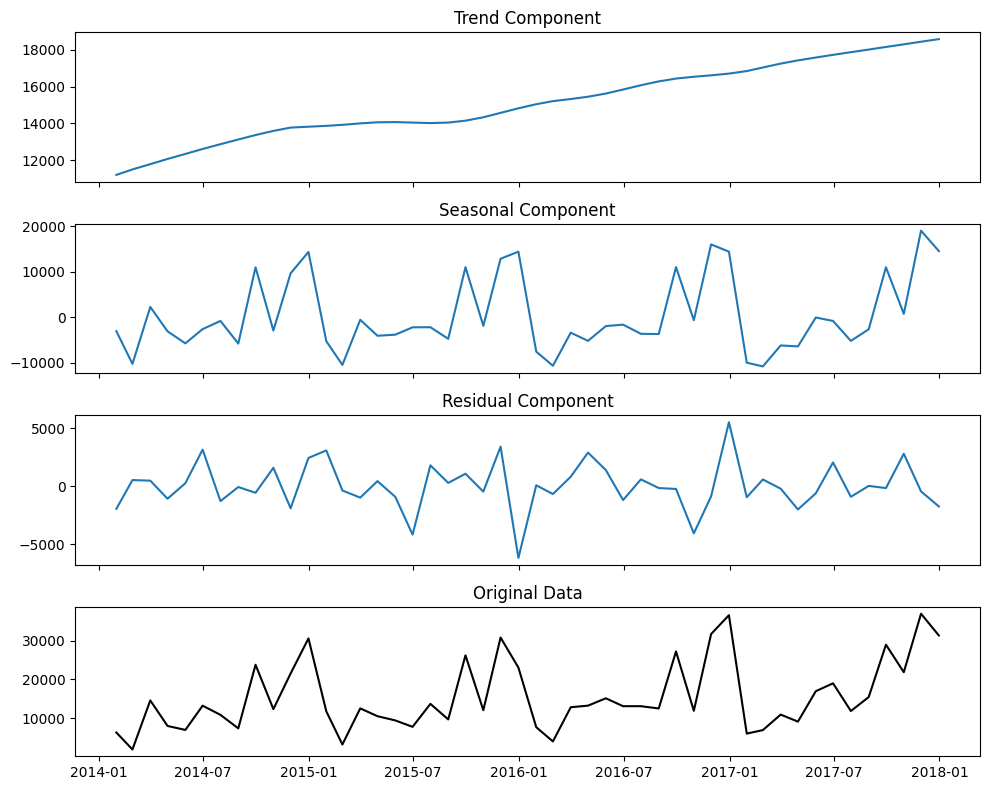

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

ax1.plot(result.trend)
ax1.set_title('Trend Component')

ax2.plot(result.seasonal)
ax2.set_title('Seasonal Component')

ax3.plot(result.resid)
ax3.set_title('Residual Component')

ax4.plot(sales_monthly, label='Original Data', color='black')
ax4.set_title('Original Data')

plt.tight_layout()
plt.show()

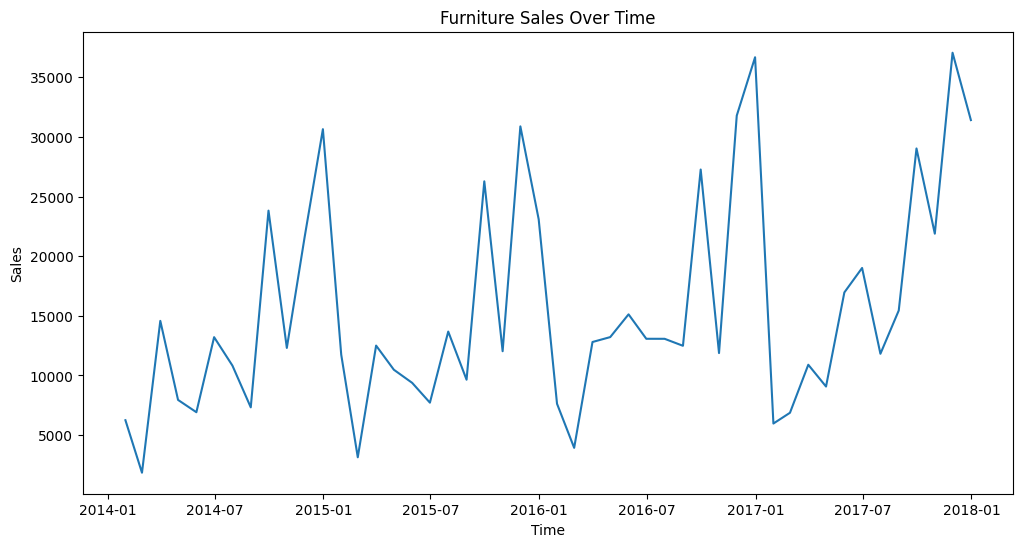

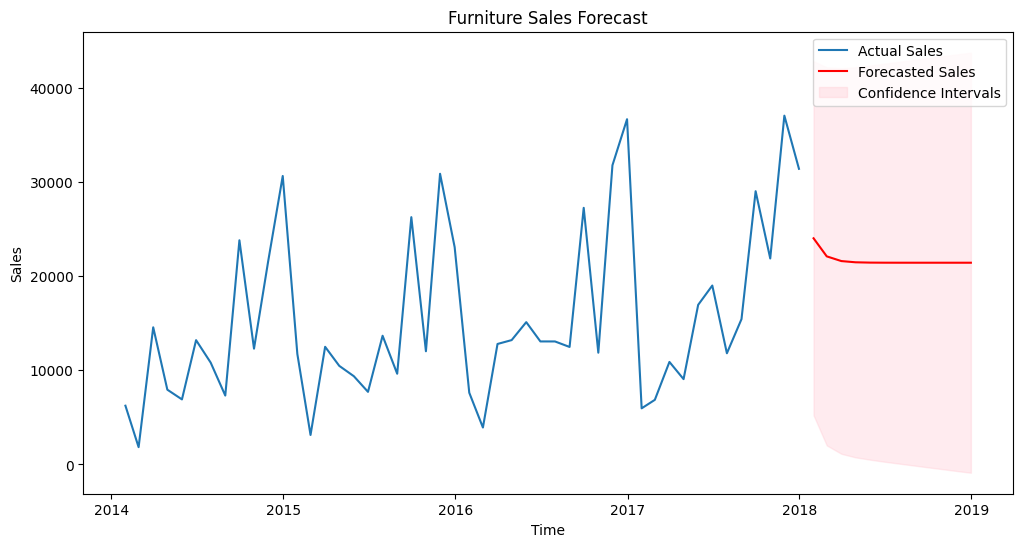

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta


df = pd.read_csv('Super_Store_data.csv', encoding='ISO-8859-1')


df['Order Date'] = pd.to_datetime(df['Order Date'])


df.set_index('Order Date', inplace=True)

sales_monthly = df['Sales'].resample('M').sum()


plt.figure(figsize=(12, 6))
plt.plot(sales_monthly)
plt.title('Furniture Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()


order = (1, 1, 1)  
model = ARIMA(sales_monthly, order=order)


model_fit = model.fit()


forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)


forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


plt.figure(figsize=(12, 6))
plt.plot(sales_monthly, label='Actual Sales')
plt.plot(forecast_values, label='Forecasted Sales', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')
plt.title('Furniture Sales Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()